# Utility Functions

In [1]:
from neural.utils import signal, plot, network, model
import numpy as np
import matplotlib.pyplot as plt

## `utils.signal` Module

In [2]:
dt, dur, start, stop, amp = 1e-4, 2, 0.5, 1.0, 100.0
t = np.arange(0, dur, dt)
wav = signal.generate_stimulus('step', dt, dur, (start, stop), amp)
amps = np.arange(0, 100, 10)
wav2 = signal.generate_stimulus('step', dt, dur, (start, stop), amps)

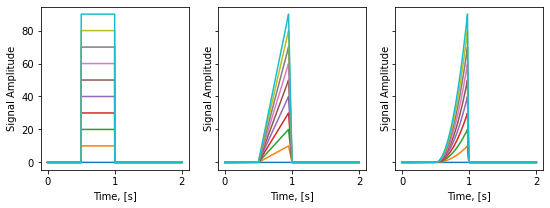

In [3]:
dt, dur, start, stop, num = 1e-4, 2, 0.5, 1.0, 10
t = np.arange(0, dur, dt)
amps = np.arange(0, 100, num)

fig,axes = plt.subplots(1,3,figsize=(9,3),sharex=True,sharey=True)
for ax, wav in zip(axes, ['step', 'ramp', 'parabola']):
    ax.plot(t, signal.generate_stimulus(wav, dt, dur, (start, stop), amps).T)
    ax.set(xlabel='Time, [s]', ylabel='Signal Amplitude')

In [4]:
spikes = signal.generate_stimulus("spike", dt, dur, (start, stop), amps)
psth, psth_t = signal.compute_psth(spikes, d_t=dt, window=20e-3, interval=10e-3)

## `utils.plot` Module

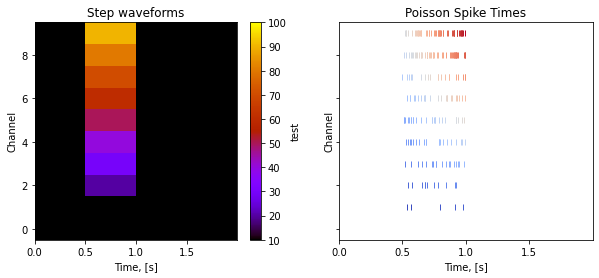

In [7]:
amps = np.arange(0, 100, 10)
spike_rates = signal.generate_stimulus('step', dt, dur, (start, stop), amps)
spikes = signal.generate_stimulus("spike", dt, dur, (start, stop), amps)

fig,axes= plt.subplots(1,2,figsize=(10,4),sharex=True, sharey=True)
plot.plot_mat(spike_rates, t=t, cax=True, vmin=10, vmax=100, cbar_kw={'label':'test'}, cmap=plt.cm.gnuplot, ax=axes[0])
axes[0].set(xlabel='Time, [s]', ylabel='Channel', title='Step waveforms')
plot.plot_spikes(spikes, t=t, linewidth=1, color=lambda x,y: x*y, cmap=plt.cm.coolwarm, ax=axes[1])
_ = axes[1].set(xlabel='Time, [s]', ylabel='Channel', title='Poisson Spike Times')